### Project By Ángel M. Ortega López


### Problem Definition
Question: What is the relationship between landslide triggers, average landslide sizes, and the average fatalities associated with them?

Understanding this relationship is important because it helps us identify triggers that are high risk and larger landslides that tend to be more dangerous. If we understand what contributes to more fatalities by landslide, we can take preventive measures and improve how prepared we are for disasters like this. This knowledge could potentially help reduce the number of fatalities by informing about the most dangerous types of landslides.

### Dataset Overview

The dataset used for this analysis is from the NASA Global Landslide Catalog (available at NASA Landslide Catalog).

This dataset contains information on global landslides, including:

Date of occurrence,
Location,
Trigger (example: rainfall, earthquakes),
Landslide size,
Number of fatalities,
and other details like location and description of the event.
This dataset was chosen because it provides the necessary information to explore the relationship between landslide triggers, sizes, and fatalities.

### Methods
To answer the main question, the following steps will be taken:

1. Data Cleaning:
    Work with missing values (NaNs) and any inconsistencies (case sensitivity in trigger names).
2. Grouping and Aggregation:
    The data will be grouped by landslide triggers, and the average landslide size and average fatalities for each trigger type will be calculated and visualized.
3. Categorization:
    Landslides will be categorized based on their size so we can compare them with fatalities. With this, we can see if larger landslides lead to higher fatality rates.
4. Visualization:
    Create plots to visualize the relationship between triggers, landslide sizes, and fatalities. These visualizations will make it easier to analyze the results.

### Loading the Dataset and Importing Python Libraries

Before beginning the analysis, we have to load the dataset and understand its structure. We begin loading the NASA Global Landslide catalog dataset into a pandas DataFrame. We also use the set_option function to display all of the column.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

landslides = pd.read_csv('nasa_global_landslide_catalog_point.csv')
pd.set_option('display.max_columns', None)
landslides.head()


,OID,source_name,source_link,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,comments,event_import_source,event_import_id,latitude,longitude,country_name,country_code,admin_division_name,gazetteer_closest_point,gazetteer_distance,submitted_date,last_edited_date,event_id
0,-1,NASA SERVIR Science Coordination Office & SERV...,https://servir.adpc.net/,NaN,NaN,Landslide in Myanmar,NaN,NaN,exact,landslide,unknown,unknown,burned_area,NaN,NaN,NaN,NaN,Cherrington/Medium/adjusted confidence/,SMMML,178,18.741125,94.693509,Myanmar,MM,Rakhine,Buyo Chaung,18.35,8/17/2018 0:00:00,NaN,11757.0
1,-1,The Bolton News,http://www.theboltonnews.co.uk/news/14174289.R...,12/30/2015 0:00:00,NaN,Forest Road,FAMILIES were forced from their homes after a ...,Forest Road,exact,mudslide,flooding,medium,above_road,0.0,0.0,NaN,NaN,NaN,GLC,9148,53.596700,-2.460000,United Kingdom,GB,England,Bolton,1.91,7/25/2016 17:42:30,NaN,9148.0
2,-1,The Arunachal Times,http://www.arunachaltimes.in/six-killed-in-meg...,6/17/2017 0:00:00,NaN,Fatal landslide in Umiam,Landslide following continuous rain kills 3 in...,"Umiam, Ribhoi, Meghalaya",5km,landslide,continuous_rain,medium,unknown,3.0,0.0,NaN,NaN,NaN,GLC,NaN,25.678368,91.923434,India,IN,Meghalaya,Shillong,6.30,7/10/2017 18:45:55,NaN,10987.0
3,-1,newvision,http://www.newvision.co.ug/D/8/12/719718,5/15/2010 0:00:00,NaN,"road to Kanungu district at Kamujegye(?), Rwer...","In Rukungiri district, motor traffic stalled a...","road to Kanungu district at Kamujegye(?), Rwer...",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,GLC,1862,-0.788800,29.821400,Uganda,UG,Kanungu,Kinyasano,10.54,4/1/2014 0:00:00,NaN,1862.0
4,-1,mcot,http://www.mcot.net/cfcustom/cache_page/187154...,3/27/2011 0:00:00,NaN,Surat Thani province,"CHUMPHON, March 27 -- Several tourists and vil...",Surat Thani province,unknown,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,GLC,3305,9.010300,99.088600,Thailand,TH,Surat Thani,Khiri Rat Nikhom,13.55,4/1/2014 0:00:00,NaN,3305.0


### Dropping Unnecessary Columns

To focus on the relationship between landslide triggers, landslide sizes, and fatalities, we are dropping columns that do not contribute to this analysis (we are also keeping some columns that will be useful later on).

    landslides.drop(): Removes columns.
    inplace=True: Changes are applied directly to the DataFrame without needing to create a copy.

In [8]:
landslides.drop(columns=['OID', 'source_name', 'source_link', 'event_date', 'event_time',
                         'event_description', 'landslide_category', 'location_accuracy', 'landslide_setting', 'injury_count',
                          'storm_name', 'photo_link', 'comments', 'event_import_source', 'event_import_id', 
                         'latitude', 'longitude', 'country_code', 'admin_division_name', 'gazetteer_closest_point',
                          'gazetteer_distance',	'submitted_date', 'last_edited_date','event_id'], inplace = True)
landslides.head()             

,event_title,location_description,landslide_trigger,landslide_size,fatality_count,country_name
0,Landslide in Myanmar,NaN,unknown,unknown,NaN,Myanmar
1,Forest Road,Forest Road,flooding,medium,0.0,United Kingdom
2,Fatal landslide in Umiam,"Umiam, Ribhoi, Meghalaya",continuous_rain,medium,3.0,India
3,"road to Kanungu district at Kamujegye(?), Rwer...","road to Kanungu district at Kamujegye(?), Rwer...",downpour,medium,0.0,Uganda
4,Surat Thani province,Surat Thani province,downpour,medium,0.0,Thailand


### Checking for Duplicates Due to Case Sensitivity
Here we look for inconsistencies in how the data is entered, looking especially at case sensitivity (example: 'Rain' vs. 'rain'). These two values mean the same thing, and if we do not adress these issues it can lead to inaccurate. So, we remove these duplicates.

    set(): Finds the unique values in a column.
    
    len(): Returns the number of unique values in the set.

In [10]:
trigger_set = set(landslides['landslide_trigger'])
print(len(trigger_set))
print(trigger_set)

24
{'leaking_pipe', 'mining', 'Other', 'Heavy Rainfall', 'monsoon', 'continuous_rain', 'dam_embankment_collapse', 'Flooding', 'unknown', 'vibration', 'no_apparent_trigger', 'volcano', 'downpour', 'construction', 'Rainfall', 'rain', 'other', 'tropical_cyclone', 'snowfall_snowmelt', 'flooding', nan, 'Unknown', 'earthquake', 'freeze_thaw'}


In [11]:
size_set = set(landslides['landslide_size'])
print(len(size_set))
print(size_set)

9
{'very_large', 'Unknown', 'medium', 'catastrophic', 'large', 'small', 'unknown', nan, 'Large'}


### Normalizing Text Data to Avoid Duplicates
To remove these inconsistencies, we convert the values in the landslide_trigger and landslide_size columns to lowercase.

    str.lower(): Changes all characters in a string to lowercase.

In [13]:
landslides['landslide_trigger'] = landslides['landslide_trigger'].str.lower()

landslides['landslide_size'] = landslides['landslide_size'].str.lower()
landslides['landslide_trigger'].unique()

array(['unknown', 'flooding', 'continuous_rain', 'downpour', 'rain',
       'no_apparent_trigger', 'monsoon', 'tropical_cyclone', 'other',
       'snowfall_snowmelt', 'construction', 'mining', 'volcano',
       'freeze_thaw', 'dam_embankment_collapse', 'earthquake',
       'leaking_pipe', 'heavy rainfall', nan, 'rainfall', 'vibration'],
      dtype=object)

### Cleaning and Standardizing Landslide Triggers
In this step, we clean and the values in the landslide_trigger column. Specifically, we combine entries that mean the same thing, such as 'rain' and 'rainfall' into a single category. This helps prevent duplicate categories with a small difference in the way they are written.


    Dictionary for Mapping: We create a dictionary (trigger_dict) to define the relationships between different terms.
    replace(): Replaces the values in the landslide_trigger column based on the dictionary mappings.

In [15]:
trigger_dict = {'rainfall':['Rainfall'],
                'unknown': ['Unknown'],
                'flooding': ['Flooding'],
                'continuous_rain': ['Rainfall'],
                'downpour': ['Rainfall'],
                'rain': ['Rainfall'],
                'no_apparent_trigger': ['No Apparent Trigger'],
                'monsoon': ['Monsoon'],
                'tropical_cyclone': ['Tropical Cyclone'],
                'other': ['Other'],
                'snowfall_snowmelt': ['Snowfall, Snowmelt'],
                'construction': ['Construction'],
                'mining': ['Mining'],
                'volcano': ['Volcano'],
                'freeze_thaw': ['Freeze Thaw'],
                'dam_embankment_collapse': ['Dam Embankment Collapse'],
                'vibration': ['Vibration'],
                'leaking_pipe': ['Leaking Pipe'],
                'earthquake': ['Earthquake'],
                'rain':['Rainfall']
               }

landslides['landslide_trigger'] = landslides['landslide_trigger'].replace(trigger_dict)

Now, we have the updated sets with no duplicate triggers.

In [17]:
trigger_set = set(landslides['landslide_trigger'])
print(len(trigger_set))
print(trigger_set)

18
{'No Apparent Trigger', 'Mining', 'Volcano', 'Rainfall', 'Unknown', 'Snowfall, Snowmelt', 'Dam Embankment Collapse', 'Tropical Cyclone', 'heavy rainfall', 'Flooding', 'Other', 'Construction', 'Vibration', 'Freeze Thaw', nan, 'Earthquake', 'Leaking Pipe', 'Monsoon'}


In [18]:
size_set = set(landslides['landslide_size'])
print(len(size_set))
print(size_set)

7
{'very_large', 'medium', 'catastrophic', 'large', 'small', 'unknown', nan}


### Handling Missing Data (NaN Values)
In this step, we work with missing values (NaN) in the dataset to make sure we are working with rows that have values. Since the main question involves analyzing the relationship between landslide triggers, sizes, and fatalities, some rows with missing data must be removed, while others are kept to retain as much useful information as possible.

Approach:
1. Remove rows with missing fatality data: Since we are specifically investigating how fatalities are related to landslide size and triggers, rows without fatality data are not useful.

2. Remove rows where both trigger and size are missing: If both the landslide_trigger and landslide_size columns are missing values, these rows do not provide the necessary data to analyze the relationships between size, trigger, and fatalities.

3. Keeping rows with individual NaNs in the landslide_trigger or landslide_size columns: These rows are kept because some of this data can still be useful for other types of analysis.

        dropna(): Removes rows where there are NaN values in a specific column.

        how='any': Removes rows where any of the specified columns have NaN.

        how='all': Removes rows where all of the specified columns have NaN.

In [20]:
landslides.dropna(subset=['fatality_count'], how='any', inplace = True)

landslides.dropna(subset=['landslide_trigger', 'landslide_size'], how='all', inplace = True)

landslides.head(10)

,event_title,location_description,landslide_trigger,landslide_size,fatality_count,country_name
1,Forest Road,Forest Road,Flooding,medium,0.0,United Kingdom
2,Fatal landslide in Umiam,"Umiam, Ribhoi, Meghalaya",Rainfall,medium,3.0,India
3,"road to Kanungu district at Kamujegye(?), Rwer...","road to Kanungu district at Kamujegye(?), Rwer...",Rainfall,medium,0.0,Uganda
4,Surat Thani province,Surat Thani province,Rainfall,medium,0.0,Thailand
5,"India Gate(?), Srinagar-Leh highway, Kashmir","India Gate(?), Srinagar-Leh highway, Kashmir",Rainfall,medium,0.0,India
6,"Kharghuli, Guwahati, Assam","Kharghuli, Guwahati, Assam",Rainfall,medium,0.0,India
7,"Mile marker 20, Hana Highway","Mile marker 20, Hana Highway",Unknown,small,0.0,United States
9,"Mizoram, India","Mizoram, India",Rainfall,large,0.0,India
10,sector buena vista,sector buena vista,Rainfall,small,0.0,Puerto Rico
11,"OR 38, milepost 11","OR 38, milepost 11",Unknown,unknown,0.0,United States


### Number of Countries in the Dataset
In this step, we are identifying how many and which countries are represented in the dataset. It is useful to know the countries where these events happened because they will be used later.

    unique(): Returns the unique values from a specified column.

In [22]:
print(landslides['country_name'].unique())

['United Kingdom' 'India' 'Uganda' 'Thailand' 'United States'
 'Puerto Rico' 'China' 'Malaysia' 'El Salvador' 'Vietnam' 'Nepal'
 'Jamaica' 'Saudi Arabia' 'Philippines' 'Panama' 'New Zealand'
 'Switzerland' 'Israel' 'Canada' 'Guam' 'Japan' 'Bangladesh'
 'Trinidad and Tobago' 'Indonesia' 'Nigeria' 'Costa Rica' 'Czech Republic'
 'Mexico' 'Azerbaijan' 'Brazil' 'Honduras' 'Dominican Republic' 'Colombia'
 'Kenya' 'France' 'Turkey' 'Myanmar' 'Morocco' 'Nicaragua' 'Sri Lanka'
 'Bolivia' 'Italy' 'Russian Federation' 'Kyrgyzstan' 'Georgia' 'Iran'
 'Australia' 'Norway' 'Fiji' 'Congo DRC' 'Angola' 'Pakistan' 'Venezuela'
 'Guatemala' 'Ecuador' 'Canarias' 'Rwanda' 'Bulgaria' 'South Korea' 'Peru'
 'Germany' nan 'Romania' 'Tajikistan' 'Ethiopia' 'Burundi' 'Ireland'
 'Kazakhstan' 'Bhutan' 'Brunei Darussalam' 'Saint Lucia' 'Poland' 'Greece'
 'Grenada' 'Portugal' 'Madagascar' 'Papua New Guinea' 'Dominica' 'Spain'
 'Solomon Islands' 'Haiti' 'Greenland' 'Cameroon' 'Yemen' "Côte d'Ivoire"
 'Tanzania' 'North

### Categorizing Landslide Sizes into Numeric Values and Grouping Data
Here we convert the landslide_size values from a string (example: 'small', 'large') into numeric values, which allows us to quantify the sizes and answer our proposed questions. We then create a new DataFrame that groups landslides by trigger, and takes the average value of the data in the columns we specify, which are the landslide size numerically and fatality count columns. We are also expressing the unknown values of landslide size as NaN, since in this case both mean that the size of the landslide is not known.


    map(): Applies a mapping (from dictionary) to a Series, which converts the sizes from strings to numeric values.
    groupby(): Groups the data by the landslide_trigger column.
    agg(): Used to apply multiple aggregation functions (example: mean, count) on different columns. This allows us to find the average values for the data in our desired columns and the number of occurences for each landslide trigger.
    sort_values(): Sorts the DataFrame based on a specified column.
    reset_index(): Resets the index of the DataFrame.


In [24]:
#size dictionary
size_values = {'small':1,
               'medium':2,
               'large':3,
               'very_large':4,
               'catastrophic':5,
               'unknown':np.nan}
#mapping values
landslides['size_numerically'] = landslides['landslide_size'].map(size_values)

#copy of dataframe
trigger_df = landslides.groupby('landslide_trigger').agg(
    mean_size_numerically=('size_numerically', 'mean'),
    mean_fatality_count=('fatality_count', 'mean'),
    n_occurences=('landslide_trigger', 'count')).sort_values(by='mean_fatality_count', ascending = False).reset_index()

trigger_df.head(19)


,landslide_trigger,mean_size_numerically,mean_fatality_count,n_occurences
0,Dam Embankment Collapse,2.850000,132.000000,20
1,Earthquake,1.940594,26.538462,104
2,Unknown,1.707591,11.846933,1875
3,Tropical Cyclone,2.078431,10.717899,514
4,Other,1.893617,9.979167,48
5,Monsoon,1.983193,7.357724,123
6,Mining,1.867925,5.432432,111
7,Rainfall,1.789024,3.703962,7597
8,"Snowfall, Snowmelt",1.863014,3.586667,150
9,Flooding,1.905882,3.500000,90


### Visualizing the Relationship Between Average Landslide Size and Average Fatalities per Trigger
In this step, we visualize the relationship between average landslide size and average fatalities for each landslide trigger. This helps us identify which triggers tend to cause larger landslides and more fatalities on average.

We use seaborn, a popular visualization library, to create a scatter plot where each point represents a specific landslide trigger. The size and color of the points help distinguish different triggers, making it easier to note the different landslide triggers.

    sns.scatterplot(): Creates a scatter plot where each point's color is changed, representing different landslide triggers.
    plt.xlabel(): Adds a label to the x-axis.
    plt.ylabel(): Adds a label to the y-axis.
    plt.title(): Adds a title to the plot.
    plt.legend(): Shows a legend and places it where it does not obstruct the visualization.

,landslide_trigger,mean_size_numerically,mean_fatality_count,n_occurences
0,Dam Embankment Collapse,2.850000,132.000000,20
1,Earthquake,1.940594,26.538462,104
2,Unknown,1.707591,11.846933,1875
3,Tropical Cyclone,2.078431,10.717899,514
4,Other,1.893617,9.979167,48


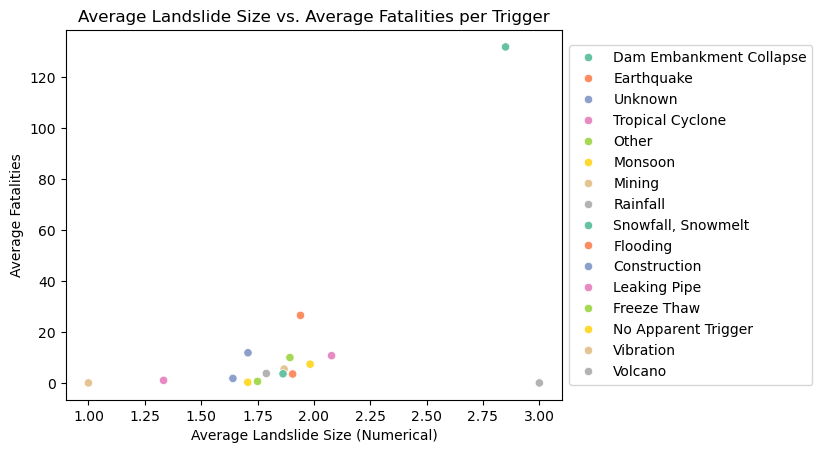

In [26]:
import seaborn as sns
sns.scatterplot(data=trigger_df[trigger_df['landslide_trigger'] != 'volcano'], x='mean_size_numerically', y='mean_fatality_count', hue='landslide_trigger', palette='Set2')

plt.xlabel('Average Landslide Size (Numerical)')
plt.ylabel('Average Fatalities')
plt.title('Average Landslide Size vs. Average Fatalities per Trigger')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
trigger_df.head()

### Identifying Problems with Triggers: Dam Embankment Collapses
In this analysis, we can observe that dam embankment collapses have a high average fatality rate (132) and this trigger occurs 20 times in the dataset. While the high fatality rate could be considered extreme, the number of occurrences (20) is significant enough that it is not a statistical outlier. However, in order to visualize the effects of other landslide triggers more clearly, we choose to filter out triggers with a mean fatality count greater than 40. This helps us focus on more common landslide triggers without being overshadowed by the extreme fatality counts of dam embankment collapses.

    boolean indexing: Filters the DataFrame to remove rows where the mean fatality count exceeds 40.


,landslide_trigger,mean_size_numerically,mean_fatality_count,n_occurences
1,Earthquake,1.940594,26.538462,104
2,Unknown,1.707591,11.846933,1875
3,Tropical Cyclone,2.078431,10.717899,514
4,Other,1.893617,9.979167,48
5,Monsoon,1.983193,7.357724,123
6,Mining,1.867925,5.432432,111
7,Rainfall,1.789024,3.703962,7597
8,"Snowfall, Snowmelt",1.863014,3.586667,150
9,Flooding,1.905882,3.500000,90
10,Construction,1.640777,1.773585,106


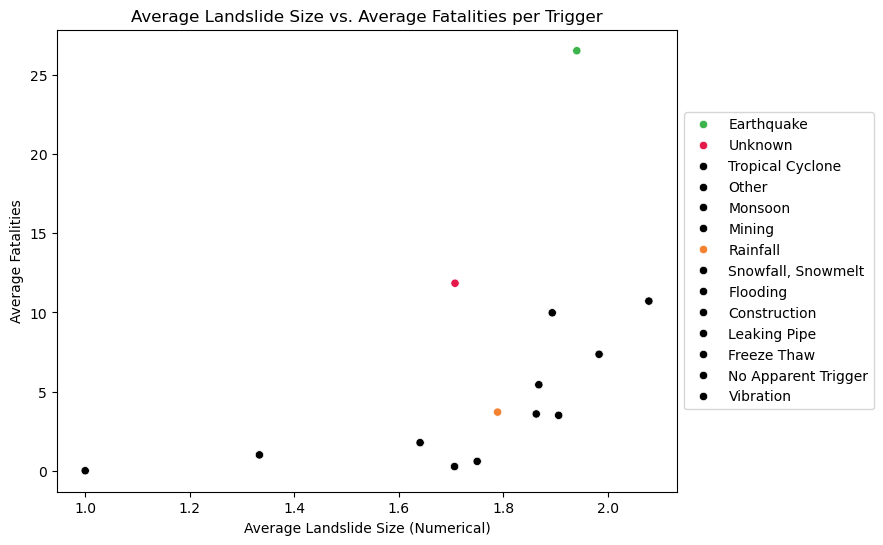

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#define colors for the three specific triggers
custom_palette = {
    'Rainfall': '#F58231',    
    'Earthquake': '#3CB44B', #green
    'Unknown': '#E6194B',     # yellow
}
#unique triggers in the dataset
unique_triggers = trigger_df['landslide_trigger'].unique()

#assign 'black' to any trigger not explicitly defined in custom_palette
full_palette = {trigger: custom_palette.get(trigger, 'black') for trigger in unique_triggers}

#plot using the updated palette
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=trigger_df[(trigger_df['mean_fatality_count'] < 40) & (trigger_df['landslide_trigger'] != 'Volcano')],
    x='mean_size_numerically',
    y='mean_fatality_count',
    hue='landslide_trigger',
    palette=full_palette 
)

plt.xlabel('Average Landslide Size (Numerical)')
plt.ylabel('Average Fatalities')
plt.title('Average Landslide Size vs. Average Fatalities per Trigger')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("my_graph3.png", dpi=300, bbox_inches='tight')  # High resolution

#display the first 16 rows for verification
trigger_df[trigger_df['mean_fatality_count'] < 40].head(16)


Here we can see the landslide triggers that are larger and more fatal on average.

### Analyzing the Most Common Landslide Triggers and Their Fatalities
In this step, we identify the most common landslide triggers in the dataset and visualize the average fatality count for each trigger. This allows us to see which types of triggers occur most frequently and how they relate with fatalities, without considering landslide size.

    mode(): Returns the most frequent value in the Series.
    plot(kind='bar'): Creates a bar chart to visualize the data.


Most common trigger is: 0    Rainfall
Name: landslide_trigger, dtype: object.


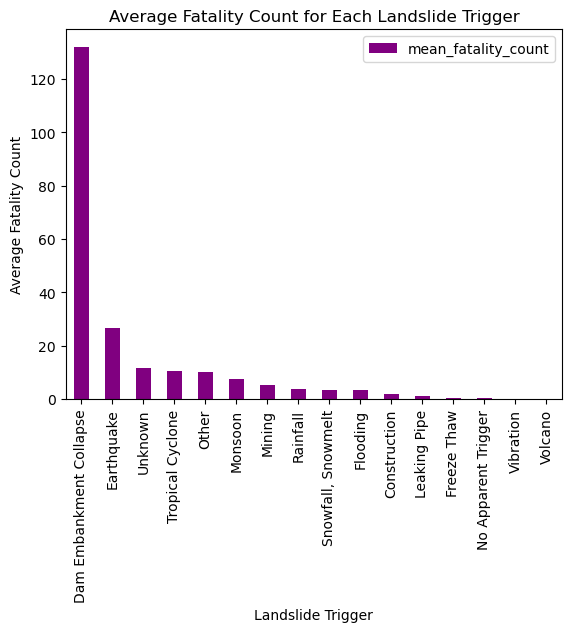

In [31]:
common_trigger = landslides['landslide_trigger'].mode()

print(f'Most common trigger is: {common_trigger}.')

#average fatality count for different types of triggers
trigger_fatalities_df = trigger_df.drop(columns =['mean_size_numerically'])

trigger_fatalities_df = trigger_fatalities_df.reset_index()

trigger_fatalities_df.plot(kind='bar', x='landslide_trigger', y='mean_fatality_count',color='purple')


plt.xlabel('Landslide Trigger')
plt.ylabel('Average Fatality Count')
plt.title('Average Fatality Count for Each Landslide Trigger')
plt.show()

### Visualizing the Number of Occurrences for Each Landslide Trigger
In this step, we visualize how frequently each landslide trigger occurs in the dataset. Understanding the number of occurrences helps highlight which triggers are most common and potentially more dangerous, as they lead to more frequent landslides.

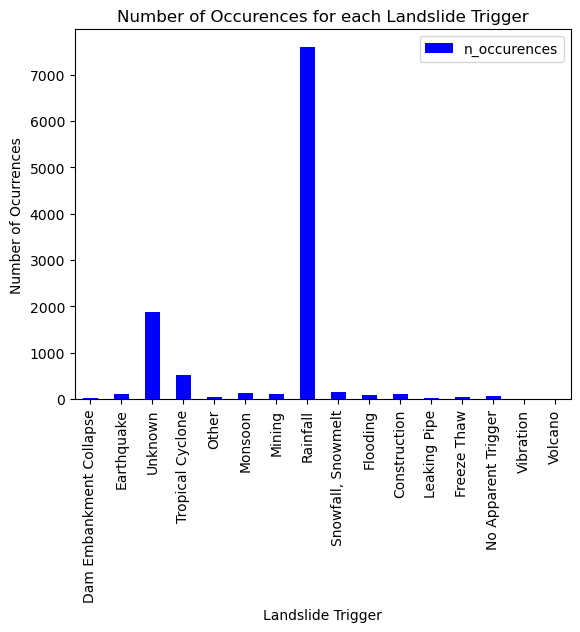

In [33]:
trigger_df.plot(kind='bar', x='landslide_trigger', y='n_occurences', color='blue')

plt.xlabel('Landslide Trigger')
plt.ylabel('Number of Ocurrences')
plt.title('Number of Occurences for each Landslide Trigger')
plt.show()

 It makes sense that rainfall cause the most landslides, as they weaken the soil, leading to instability.

### Investigating the Correlation Between Landslide Size and Fatalities
In this step, we explore whether there is a correlation between landslide size and fatality count. While it seems intuitive that larger landslides would result in more fatalities, we calculate the actual correlation to find the relationship between these two variables.

    corr(): Finds the correlation between two numerical columns.

In [36]:
correlation = landslides['size_numerically'].corr(landslides['fatality_count'])


print(correlation)

print(landslides.shape)

0.0933731145606715
(10881, 7)


Generally, a value of 0.09 means that there is basically no relationship between the size of the landslide and number of fatalities. This is difficult to undestand because intuitively, it would make sense for larger landslides cause more fatalities.

### Visualizing the Relationship Between Landslide Size and Fatalities
In this step, we create a scatter plot to visualize the relationship between the numerical size of landslides and the fatality count, without considering the specific landslide trigger. The plot helps illustrate the overall distribution of landslides and fatalities, where the darker areas indicate higher concentrations of landslide occurrences.

    alpha: Controls the transparency of the points, allowing overlapping points to be darker, indicating more frequent occurrences.

The number of points being plotted is 10881.


Text(0, 0.5, 'Fatalities')

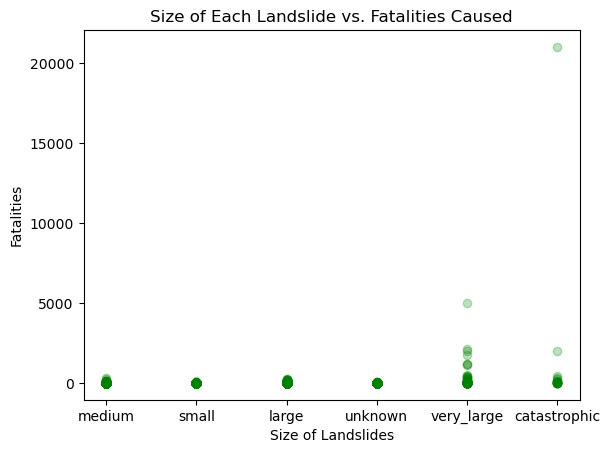

In [39]:
print(f'The number of points being plotted is {len(landslides)}.')

plt.scatter(landslides['landslide_size'], landslides['fatality_count'], alpha = 0.25, color='green')
plt.title('Size of Each Landslide vs. Fatalities Caused')
plt.xlabel('Size of Landslides')
plt.ylabel('Fatalities')

### Investigating the High Number of "Unknown" Landslide Triggers
While analyzing the dataset, we observed that nearly 2,000 occurrences of landslides have an unknown trigger. This is an interesting question: Why are so many landslide triggers categorized as unknown? One possible hypothesis is that the countries reporting these unknown triggers might lack the resources or funding to investigate and classify the causes of landslides. Additionally, it may be possible that these countries have limited interaction or collaboration with organizations like NASA or other global scientific bodies, which could affect data collection and reporting.

### Analyzing the Distribution of "Unknown" Landslide Triggers by Country
To investigate why so many landslides have an unknown trigger, we analyze the distribution of these occurrences across different countries. This will help us identify whether certain countries have significantly higher numbers of unknown causes and suggest a lack of resources or limited scientific collaboration. We group the landslide data by country name and find the number of times a landslide trigger is recorded.

In [42]:
unknown_causes = landslides[landslides['landslide_trigger'] == 'Unknown'].reset_index()

unknown_causes_group = unknown_causes.groupby('country_name').agg(
    n_occurences=('landslide_trigger','count')).sort_values('n_occurences', ascending = False).reset_index()

unknown_causes_group.head()

,country_name,n_occurences
0,United States,1198
1,India,112
2,Nepal,75
3,United Kingdom,73
4,Canada,44


### Visualization of Number of Unknown Ocurrences by Country (Top 10)
In this step, we create a bar chart to visualize the top 10 countries with the highest number of unknown landslide triggers. This visualization helps us identify where the issue of unclassified landslide triggers is most present.

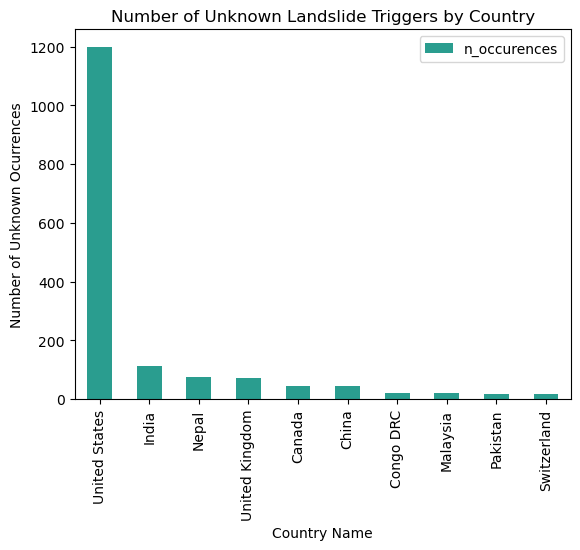

In [44]:
unknown_causes_group.head(10).plot(kind='bar', x='country_name', y='n_occurences',color='#2A9D8F')

plt.xlabel('Country Name')
plt.ylabel('Number of Unknown Ocurrences')
plt.title('Number of Unknown Landslide Triggers by Country')
plt.show()

### Visualizing Unknown Landslide Triggers Excluding the United States
Since NASA is a U.S. government agency, it is expected that the United States would have the highest number of entries in the dataset, including those with unknown triggers. To gain a clearer understanding of the global distribution of unknown landslide triggers, we filter out the U.S. data and then visualize the top 10 countries with the highest number of unknown triggers.

    boolean indexing: Filters the DataFrame to exclude rows where the country is the United States.

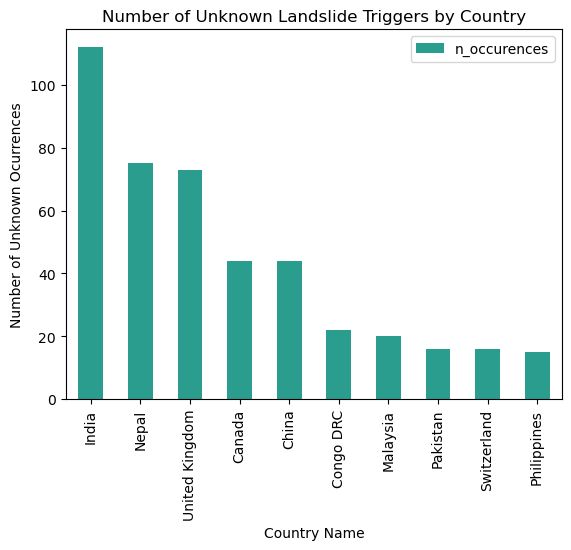

In [46]:
unknown_causes_group[unknown_causes_group['country_name'] != 'United States'].head(10).plot(kind='bar', x='country_name', y='n_occurences',color='#2A9D8F')

plt.xlabel('Country Name')
plt.ylabel('Number of Unknown Ocurrences')
plt.title('Number of Unknown Landslide Triggers by Country')
plt.show()

### Analyzing the "Unknown" Occurrence Percentage for Each Country
In this step, we calculate the unknown occurrence rate for each country. This rate is defined as the number of unknown trigger occurrences divided by the total number of occurrences for that country. By doing so, we can determine the proportion of unknown triggers relative to the total number of landslides reported in each country. This metric provides a clearer understanding of how frequently unknown triggers are reported compared to known ones.

    groupby(): Groups the data by country to calculate the total number of occurrences.

In [48]:
trigger_group = landslides.groupby('country_name').agg(
    n_occurences=('landslide_trigger','count')).sort_values('n_occurences', ascending = False).reset_index()

trigger_group['unknown_occurences']= unknown_causes_group['n_occurences']

trigger_group['unknown_occurence_%'] = trigger_group['unknown_occurences']*100/trigger_group['n_occurences']

trigger_group = trigger_group.sort_values('unknown_occurence_%', ascending = False).reset_index(drop=True)
trigger_group.head()


,country_name,n_occurences,unknown_occurences,unknown_occurence_%
0,United States,3523,1198.0,34.005109
1,Croatia,5,1.0,20.000000
2,Guinea,6,1.0,16.666667
3,Yemen,6,1.0,16.666667
4,Saint Vincent and the Grenadines,6,1.0,16.666667


### Visualizing the Top 10 Countries with the Highest Unknown Occurrence Rate
In this step, we visualize the top 10 countries with the highest unknown occurrence rate. This bar chart allows us to easily compare which countries report the highest proportion of unknown landslide triggers relative to their total number of reported landslides. Countries with a high unknown occurrence rate might face challenges in data collection or reporting.

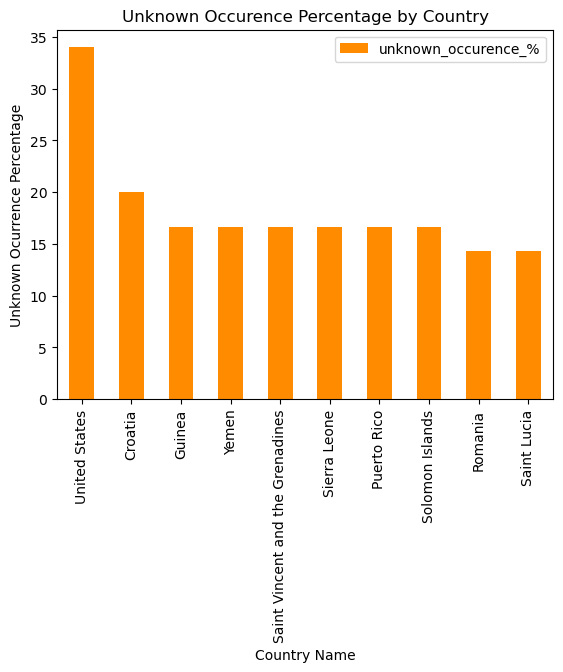

In [50]:
trigger_group.head(10).plot(kind='bar', x='country_name', y='unknown_occurence_%',color='#FF8C00')


plt.xlabel('Country Name')
plt.ylabel('Unknown Ocurrence Percentage')
plt.title('Unknown Occurence Percentage by Country')
plt.show()

### Filtering Countries with Less Than 50 Landslide Occurrences and Visualizing the Unknown Occurrence Rate
Since the United States reports many more landslides than other countries, it appears at the top of the list for unknown occurrence rate. To gain a clearer view of countries with substantial data, we again filter out the United States and select only those countries where the total number of landslide occurrences exceeds 50 (personal choice). This allows us to focus on countries that report a significant number of landslides and analyze their unknown occurrence rate more accurately.

    boolean indexing: Filters the DataFrame to exclude the United States and only includes countries with more than 50 landslide occurrences.

### GDP Per Capita Addition

To better capture the relationship between socioeconomic status and the percentage of unknown occurrences by country, we introduce GDP per capita as an additional metric. By coloring each country according to its GDP per capita, we can assess whether socioeconomic conditions are linked to the prevalence of unknown occurrences. In particular, this may reveal whether countries with lower GDP per capita lack sufficient resources to invest in the research and monitoring necessary to better understand landslides.


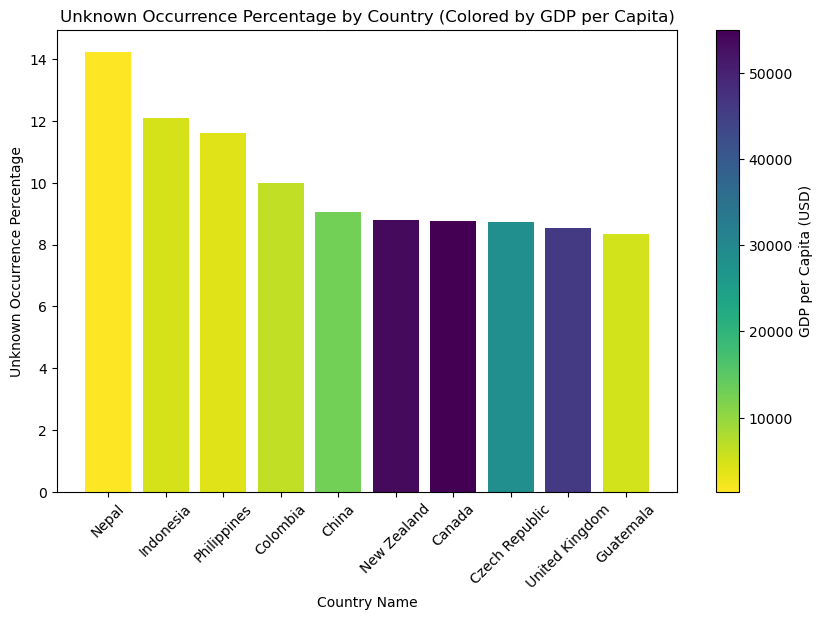

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

country_list = ['Nepal', 'Indonesia', 'Philippines', 'Colombia', 'China', 'New Zealand', 'Canada', 'Czech Republic', 'United Kingdom', 'Guatemala']
trigger_group = trigger_group[trigger_group['country_name'].isin(country_list)]

#gdp data
gdp_data = {
    'country_name': ['Nepal', 'Indonesia', 'Philippines', 'Colombia', 'China', 'New Zealand', 'Canada', 'Czech Republic', 'United Kingdom', 'Guatemala'],
    'gdp_per_capita': [1378, 4920, 3906, 6538, 12720, 53703, 55000, 28487, 46000, 5000]
}
gdp_df = pd.DataFrame(gdp_data)

#merge GDP data with trigger_group data
merged_data = trigger_group.merge(gdp_df, on='country_name', how='left')

#normalize GDP per capita for color mapping
norm = plt.Normalize(merged_data['gdp_per_capita'].min(), merged_data['gdp_per_capita'].max())
colors = plt.cm.viridis_r(norm(merged_data['gdp_per_capita']))

#create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(merged_data['country_name'], merged_data['unknown_occurence_%'], color=colors)

#labels
ax.set_xlabel('Country Name')
ax.set_ylabel('Unknown Occurrence Percentage')
ax.set_title('Unknown Occurrence Percentage by Country (Colored by GDP per Capita)')
plt.xticks(rotation=45)

#add color bar
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])  # Required for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('GDP per Capita (USD)')

plt.savefig("my_graph2.png", dpi=300, bbox_inches='tight')  # High resolution
plt.show()

### Final Reflection
The main question we set out to answer was: What is the relationship between landslide triggers, average landslide sizes, and the average fatalities associated with them?

From the analysis, we can see landslides caused by earthquakes tend to be larger (close to 2) and have the highest average fatality count. So, earthquakes tend to cause larger and more dangerous landslides on average. This could be explained due to the fact that earthquakes happen unexpectedly and there is no time to make sure people are far from landslide-prone areas. We also found that rainfall-related triggers (specifically heavy rainfall) are the most common causes of landslides globally, which is expected given that rainfall often weakens the soil, making the terrain unstable. However, contrary to intuition, we found that there is no strong correlation between the size of a landslide and the number of fatalities it causes. This was surprising, as larger landslides would logically be assumed to cause more fatalities, but the data shows otherwise, with a correlation coefficient close to zero (0.09).

Additionally, during the exploration of unknown triggers, we discovered that nearly 2,000 landslides in the dataset had unknown causes. As we further analyzed the data, we found that many of these unknown triggers occurred in mountainous regions, where the terrain likely makes it difficult to properly analyze and identify the cause of the landslide. We also found that socio-economic factors may play a role, as countries with limited resources for research and data collection tend to report higher rates of unknown landslide causes.

By filtering out data from the United States, which had disproportionately high reporting due to NASA's involvement, we were able to identify mountainous countries with high unknown occurrence rates, confirming our hypothesis that terrain and infrastructure challenges impact landslide cause reporting.

To do this analysis we applied: data cleaning, grouping, mapping, and visualizations to provide a meaningful answer to the main question about landslide triggers, sizes, and fatalities. However, we could further analyze the correlation between landslide size and fatalities to see if there is further meaning behind the low correlation found. We can also investigate and add other factors, such as population density and proximity to urban areas which can help explain the relationship between landslides and fatalities more accurately.

Ultimately, this project highlights the importance of integrating both geophysical and socioeconomic dimensions when studying natural hazards. Landslide impacts are not determined by physical triggers alone, but also by human factors such as preparedness, infrastructure, and research capacity. Recognizing this complexity can guide better risk assessments and inform more effective strategies for disaster mitigation and response.